## Training and Building the model

In [2]:
pip install tensorflow matplotlib numpy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


------------------------------------------------

In [7]:
import tensorflow as tf 
import numpy
from matplotlib import pyplot as plt

### loading dataset


In [9]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3

In [10]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
    
)

Found 16011 files belonging to 10 classes.


In [11]:
class_names = dataset.class_names
class_names

['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

#### Previewing the data

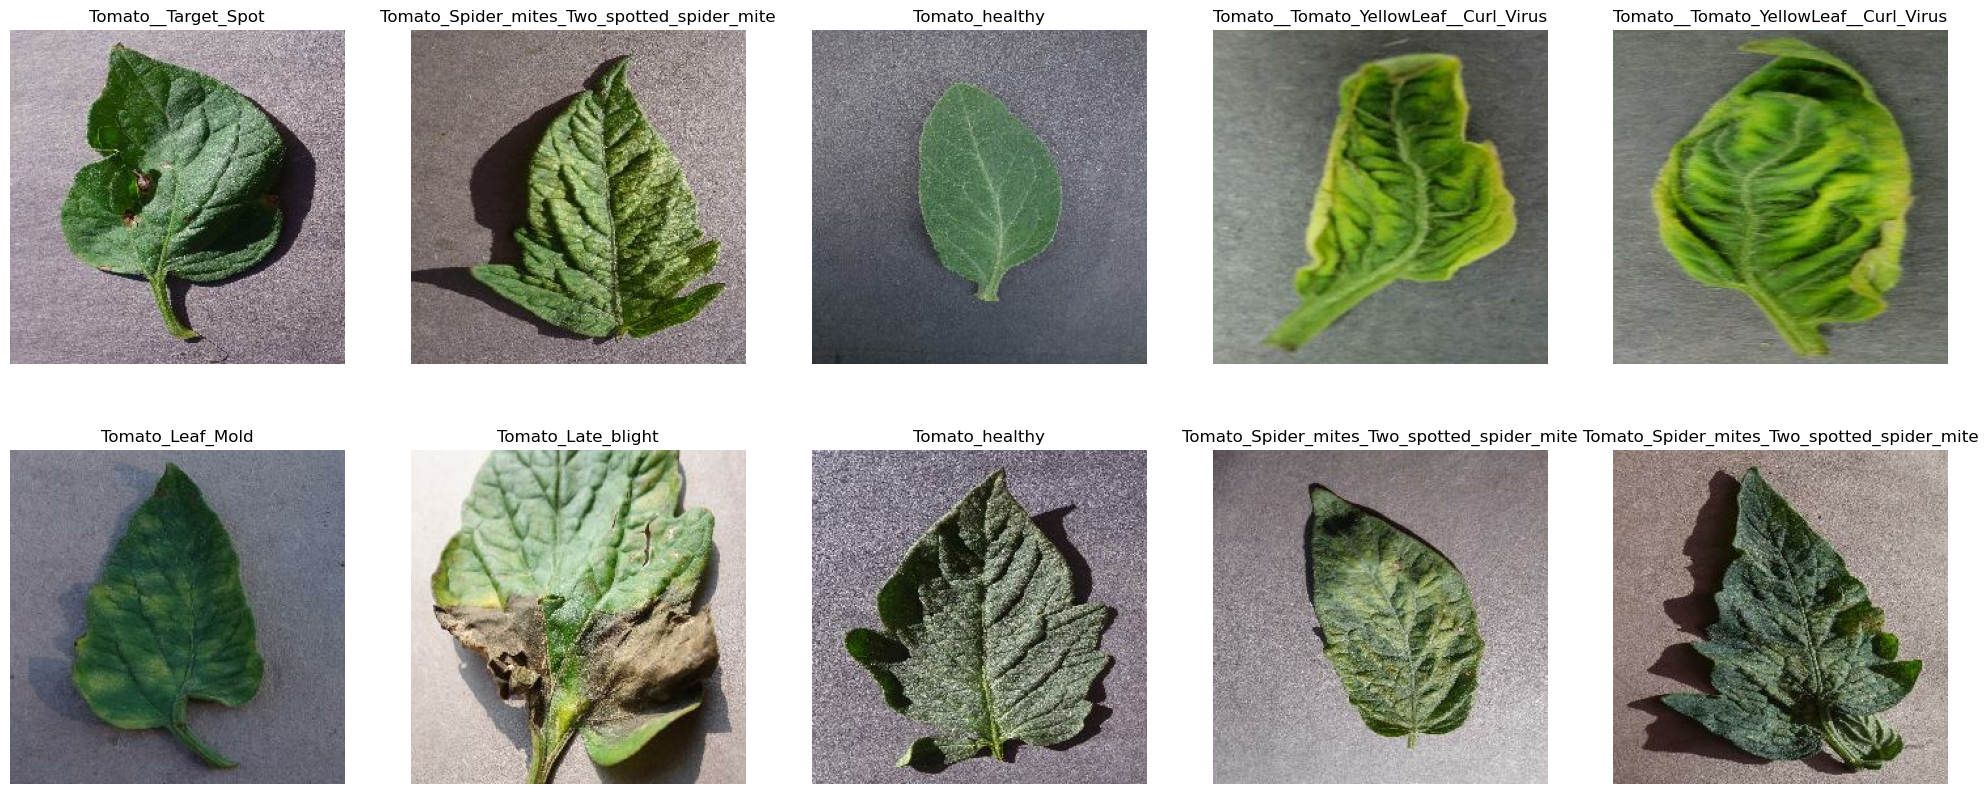

In [22]:
plt.figure(figsize=(25,10))
for img_batch, label_batch in dataset.take(1):
    for i in range(10):
        plt.subplot(2,5,i+1)
        plt.imshow(img_batch[i].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')

#### Total Data 
*Split Dataset into these sets*
1. Training Data (80%)
2. Validation Data (10%)
3. Testing Data (10%)

In [25]:
def partition_data(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=100000):
    if shuffle:
        ds = ds.shuffle(shuffle_size,seed=12)
    dataset_len = len(ds)

    train_size = int(train_split * dataset_len)
    val_size = int(val_split * dataset_len)

    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds
    

In [26]:
train_ds, val_ds, test_ds = partition_data(dataset)

In [27]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [28]:
from tensorflow.keras.layers import Resizing, Rescaling, RandomFlip, RandomRotation

In [29]:
resize_and_rescale = tf.keras.Sequential([
    Resizing(IMAGE_SIZE,IMAGE_SIZE),
    Rescaling(1.0/255)
])

In [30]:
data_augmentation = tf.keras.Sequential([
    RandomFlip("horizontal_and_vertical"),
    RandomRotation(0.2)
])

In [32]:
from tensorflow.keras import models,layers

In [33]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = len(class_names)

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

C:\Users\ram\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (32, 254, 254, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (32, 127, 127, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (32, 125, 125, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (32, 62, 62, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (32, 60, 60, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (32, 30, 30, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (32, 28, 28, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (32, 14, 14, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (32, 12, 12, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (32, 6, 6, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (32, 4, 4, 64)              │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (32, 2, 2, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (32, 256)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (32, 64)                    │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (32, 10)                    │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 184,202 (719.54 KB)

 Trainable params: 184,202 (719.54 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
    
)

In [36]:
history = model.fit(
    train_ds,
    epochs=30,
    batch_size= BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)


Epoch 1/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 557s 1s/step - accuracy: 0.3697 - loss: 1.7435 - val_accuracy: 0.7081 - val_loss: 0.8320
Epoch 2/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 411s 1s/step - accuracy: 0.7276 - loss: 0.7814 - val_accuracy: 0.8331 - val_loss: 0.4825
Epoch 3/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 327s 818ms/step - accuracy: 0.8163 - loss: 0.5303 - val_accuracy: 0.8069 - val_loss: 0.5337
Epoch 4/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 377s 943ms/step - accuracy: 0.8716 - loss: 0.3761 - val_accuracy: 0.8875 - val_loss: 0.3030
Epoch 5/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 345s 863ms/step - accuracy: 0.8949 - loss: 0.3043 - val_accuracy: 0.9087 - val_loss: 0.2535
Epoch 6/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 354s 886ms/step - accuracy: 0.9098 - loss: 0.2544 - val_accuracy: 0.9450 - val_loss: 0.1609
Epoch 7/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 331s 828ms/step - accuracy: 0.9182 - loss: 0.2333 - val_accuracy: 0.9481 - val_loss: 0.1511
Epoch 8/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 328s 819ms/step - accuracy: 0.9327 - loss:

In [37]:
model.evaluate(test_ds)

51/51 ━━━━━━━━━━━━━━━━━━━━ 125s 348ms/step - accuracy: 0.9762 - loss: 0.0705


[0.0734831690788269, 0.9785539507865906]

In [38]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [40]:
EPOCHS=30

Text(0.5, 1.0, 'Training and Validation Loss')

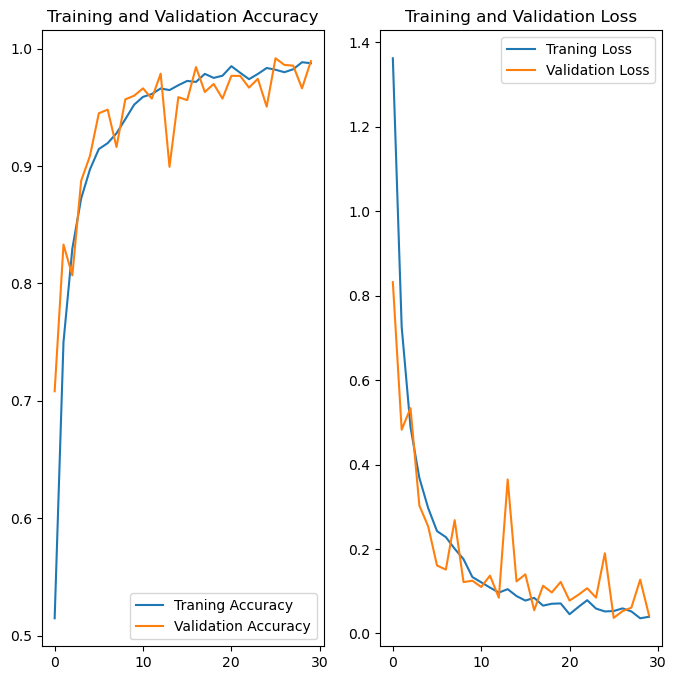

In [41]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Traning Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Traning Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')